### Expressing the annual average solar exposition for a given latitude

In [142]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [143]:
plt.style.use('dark_background')

In [144]:
def dayly_exposure(O, phi, tau = 0.409):
    delta = tau * np.sin(O)
    T = np.tan(delta)*np.tan(phi)
    # Check if we have midnight sun
    t0 = 0
    if T >= 1:
        # The sun does not set 
        t0 = np.pi
    elif T <= -1:
        # The sun does not rise
        return 0
    else:
        # Sunrise and sunset
        t0 = np.arccos(T)
    # if np.sin(O) > (np.pi - 2*phi) / (2*tau):
    #     return 0
    return 2 * ( t0 * np.sin(delta) * np.sin(phi) 
        + np.cos(delta) * np.cos(phi) * np.sin(t0)) 

In [145]:
# Get yearly average by summing over all days and dividing by 365
def yearly_exposure_sum(phi, tau = 0.409):
    return np.sum([dayly_exposure(O, phi, tau) for O in np.linspace(0, 2*np.pi, 365)]) / 365

In [146]:
def yearly_approx(phi, S2 = -0.477):
    return 1 + S2 * 0.5 * (3 * np.sin(phi)**2 - 1)

C:\Users\rannu\AppData\Local\Temp\ipykernel_65760\2575653052.py:9: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  exposure = sp.integrate.quad(lambda O: dayly_exposure(O, phi_enum), -np.pi, np.pi, limit=100)


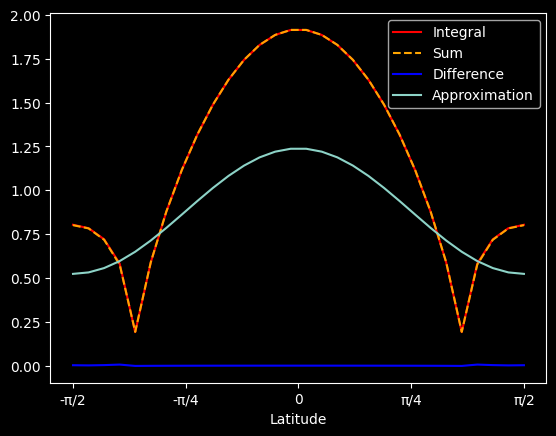

In [147]:
# Integrate over over the year
phi_list = np.linspace(-np.pi/2, np.pi/2, 30)

integral_list = np.zeros(len(phi_list))
yearly_approx_list = np.zeros(len(phi_list))
yearly_exposure_sum_list = np.zeros(len(phi_list))

for i, phi_enum in enumerate(phi_list):
    exposure = sp.integrate.quad(lambda O: dayly_exposure(O, phi_enum), -np.pi, np.pi, limit=100)
    integral_list[i] = exposure[0]*(1/(2*np.pi))
    yearly_approx_list[i] = yearly_approx(phi_enum)
    yearly_exposure_sum_list[i] = yearly_exposure_sum(phi_enum)

plt.plot(phi_list, integral_list, label = 'Integral', color = 'red')
plt.plot(phi_list, yearly_exposure_sum_list, label = 'Sum', linestyle = '--', color = 'orange')
plt.plot(phi_list, ((integral_list - yearly_exposure_sum_list)), label = 'Difference', color = 'blue')
plt.plot(phi_list, yearly_approx_list, label = 'Approximation')
plt.legend()
plt.xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2], ['-π/2', '-π/4', '0', 'π/4', 'π/2'])
plt.xlabel('Latitude')
plt.show()

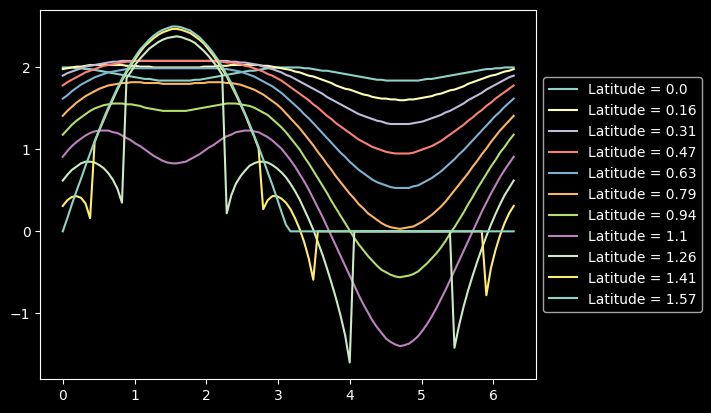

In [148]:
Orbit_list = np.linspace(0, 2*np.pi, 100)
# Latitude_list = np.linspace(-np.pi, np.pi/2, 15)
Latitude_list = np.linspace(0, np.pi/2, 11)

fig, ax = plt.subplots()
for Latitude in Latitude_list:
    one_tatitude = [dayly_exposure(Orbit, Latitude) for Orbit in Orbit_list]
    ax.plot(Orbit_list, np.round(one_tatitude, 2), label = f'Latitude = {np.round(Latitude, 2)}')
# plot legend on the outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


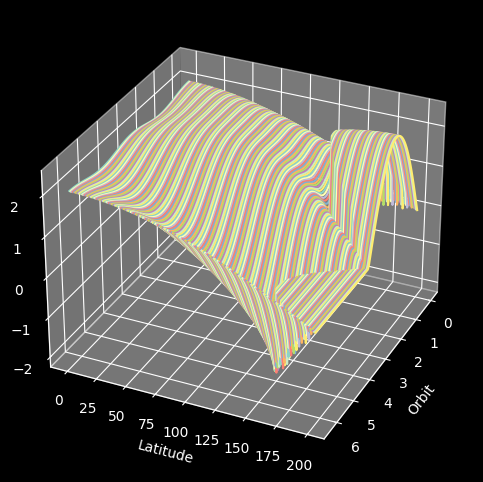

In [150]:
no_latitudes = 200
Orbit_list = np.linspace(0, 2*np.pi, 100)
# Latitude_list = np.linspace(-np.pi, np.pi/2, 15)
Latitude_list = np.linspace(0, np.pi/2, no_latitudes)
no_latitudes_list = np.linspace(0, no_latitudes, no_latitudes)

# make a 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, Latitude in enumerate(Latitude_list):
    one_tatitude = [dayly_exposure(Orbit, Latitude) for Orbit in Orbit_list]
    ax.plot(Orbit_list, [i]*len(Orbit_list), one_tatitude, label = f'Latitude = {np.round(Latitude, 2)}')
# set latitude labels between 0 and pi/2, but 
ax.set_xlabel('Orbit')
ax.set_ylabel('Latitude')
ax.set_zlabel('Exposure')
# rotate the plot
ax.view_init(30, 25)
# imcrease the size of the plot
fig.set_size_inches(6,6)
plt.show()
